In [55]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importing Machine Learning Library
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings('ignore')
sns.set_style()


In [6]:
# Importing & Viewing Data
df=pd.read_csv('F:\All_Certificates\Artificial_Intelligence\Machine learning\Projects\heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.shape

(1025, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [13]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [14]:
#rename the columns
df.rename(columns={'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain',
    'trestbps': 'Resting_BP',
    'chol': 'Cholestrol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Electrocardiographic',
    'thalach': 'Max_Heart_Rate',
    'exang': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slope': 'Slope',
    'ca': 'No_Major_Vessels',
    'thal': 'Thal',
    'target': 'Target'
}, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1025 non-null   int64  
 1   Sex                           1025 non-null   int64  
 2   Chest Pain                    1025 non-null   int64  
 3   Resting_BP                    1025 non-null   int64  
 4   Cholestrol                    1025 non-null   int64  
 5   Fasting_Blood_Sugar           1025 non-null   int64  
 6   Resting_Electrocardiographic  1025 non-null   int64  
 7   Max_Heart_Rate                1025 non-null   int64  
 8   Exercise_Induced_Angina       1025 non-null   int64  
 9   Old_Peak                      1025 non-null   float64
 10  Slope                         1025 non-null   int64  
 11  No_Major_Vessels              1025 non-null   int64  
 12  Thal                          1025 non-null   int64  
 13  Tar

### Data_preprocessing

In [16]:
df1=df.copy()

In [17]:
df1.replace({'Sex': {0: 'Female',1: 'Male'}},inplace=True)

df1.replace({'Target': {0: 'Clean', 1:'Disease'}}, inplace=True)

### Data Visualization

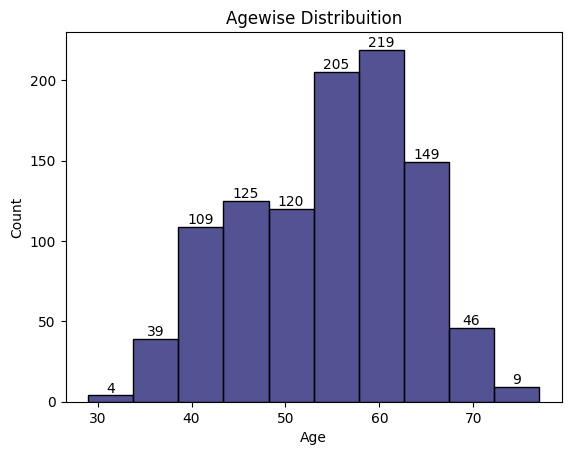

In [20]:
ax=sns.histplot(df1['Age'],bins=10,color='midnightblue')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Agewise Distribuition')
for lab in ax.containers:
    ax.bar_label(lab)

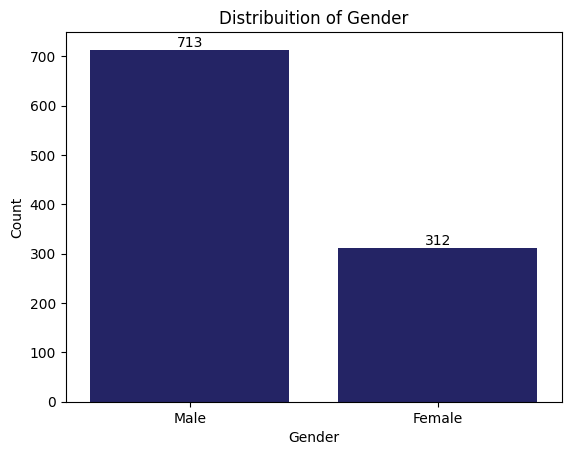

In [25]:
ax = sns.countplot(x=df1['Sex'], color='midnightblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribuition of Gender')

for lab in ax.containers:
    ax.bar_label(lab)

Text(0, 0.5, 'Count')

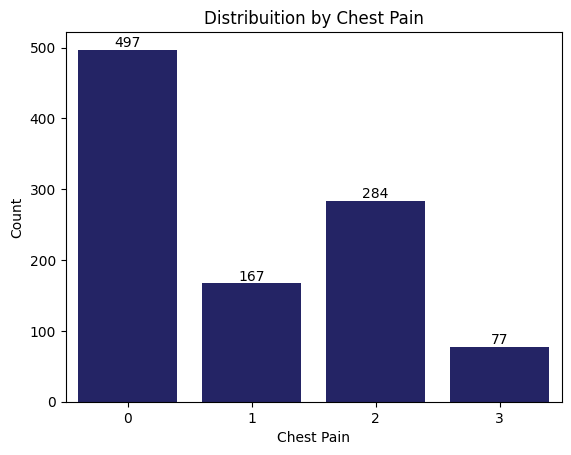

In [26]:
plt.title('Distribuition by Chest Pain')
ax = sns.barplot(x=df1['Chest Pain'].value_counts().index, y=df1['Chest Pain'].value_counts().values, color='midnightblue')

for lab in ax.containers:
    ax.bar_label(lab)

plt.xlabel('Chest Pain')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

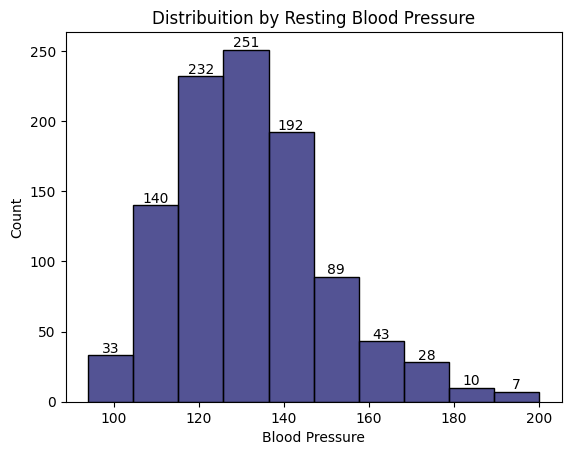

In [27]:
plt.title('Distribuition by Resting Blood Pressure')
ax = sns.histplot(df['Resting_BP'], bins=10, color='midnightblue')

for lab in ax.containers:
    ax.bar_label(lab)
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
    

Text(0, 0.5, 'Count')

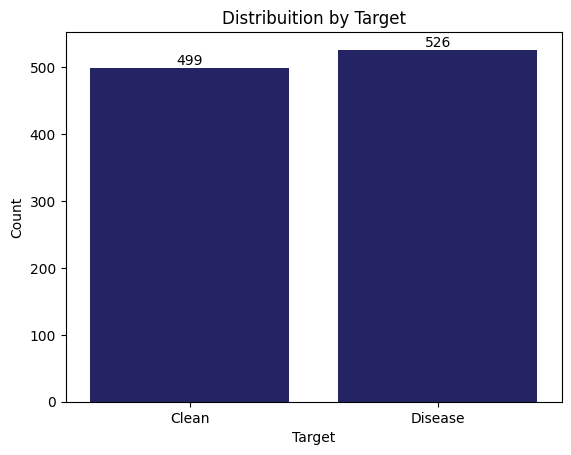

In [28]:
plt.title('Distribuition by Target')
ax = sns.countplot(x=df1['Target'], color='midnightblue')

for lab in ax.containers:
    ax.bar_label(lab)

plt.xlabel('Target')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

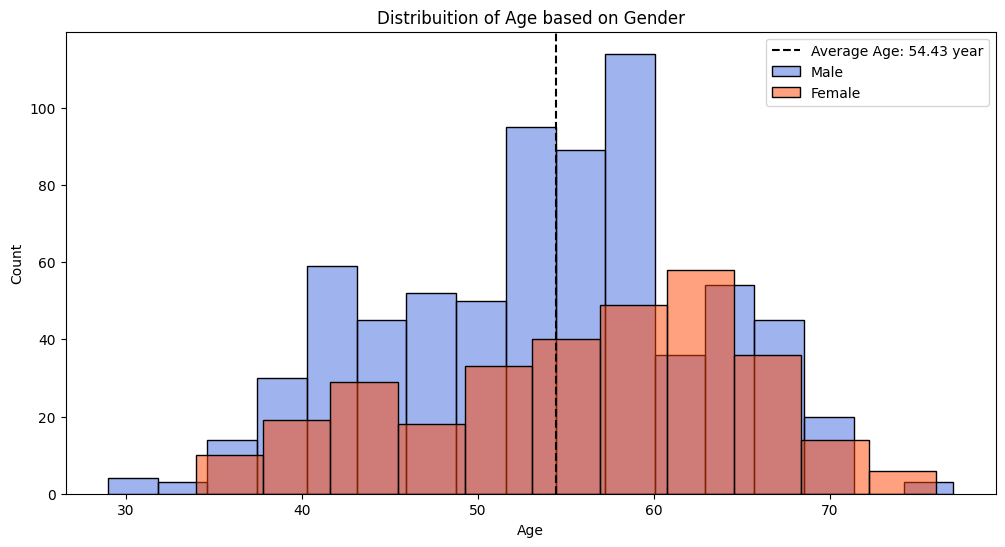

In [35]:
plt.figure(figsize=(12,6))

average_age = np.mean(df1['Age'])

plt.title('Distribuition of Age based on Gender')

sns.histplot(df1[df1['Sex']=='Male']['Age'],alpha=0.5, color='#4169E1', label='Male')

sns.histplot(df1[df1['Sex']=='Female']['Age'],alpha=0.5, color='#FF4500', label='Female')

plt.axvline(x=average_age,color='k', linestyle='--', label=f'Average Age: {average_age:.2f} year')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')

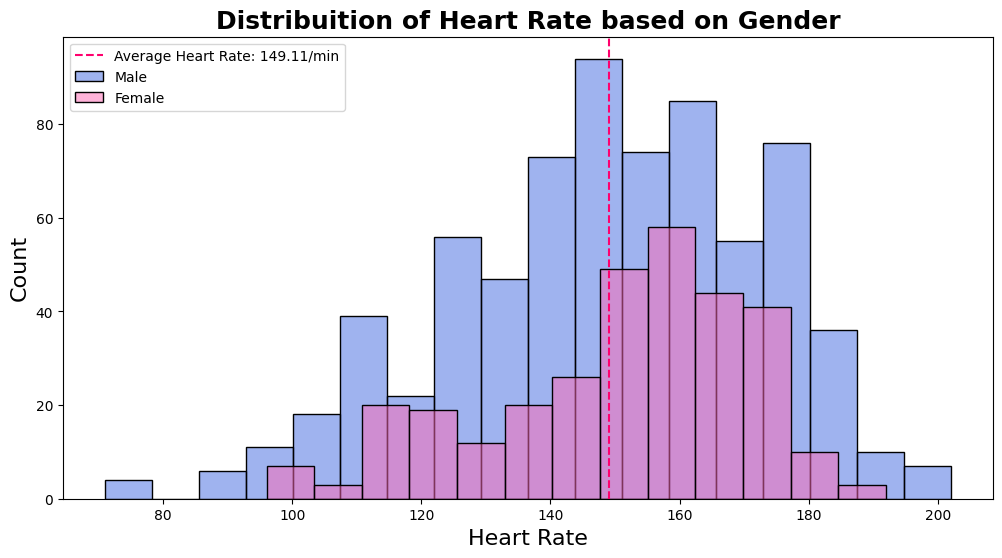

In [36]:
average_hr = np.mean(df1['Max_Heart_Rate'])

plt.figure(figsize=(12,6))

plt.title('Distribuition of Heart Rate based on Gender', fontsize=18, fontweight='bold')

sns.histplot(df1[df1['Sex']=='Male']['Max_Heart_Rate'], alpha=0.5, color='#4169E1', label='Male')

sns.histplot(df1[df1['Sex']=='Female']['Max_Heart_Rate'], alpha=0.5, color='#FF69B4', label='Female')

plt.axvline(x=average_hr, color='#ff006e', linestyle='--', label=f'Average Heart Rate: {average_hr:.2f}/min')

plt.xlabel('Heart Rate', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

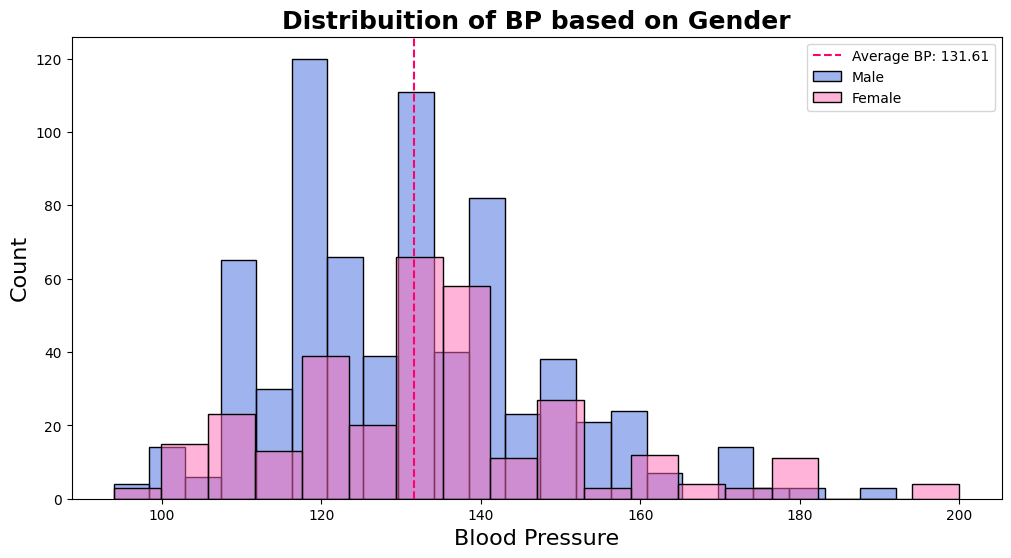

In [37]:
average_bp = np.mean(df1['Resting_BP'])

plt.figure(figsize=(12,6))

plt.title('Distribuition of BP based on Gender', fontsize=18, fontweight='bold')

sns.histplot(df1[df1['Sex']=='Male']['Resting_BP'], alpha=0.5, color='#4169E1', label='Male')

sns.histplot(df1[df1['Sex']=='Female']['Resting_BP'], alpha=0.5, color='#FF69B4', label='Female')

plt.axvline(x=average_bp, color='#ff006e', linestyle='--', label=f'Average BP: {average_bp:.2f}')

plt.xlabel('Blood Pressure', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

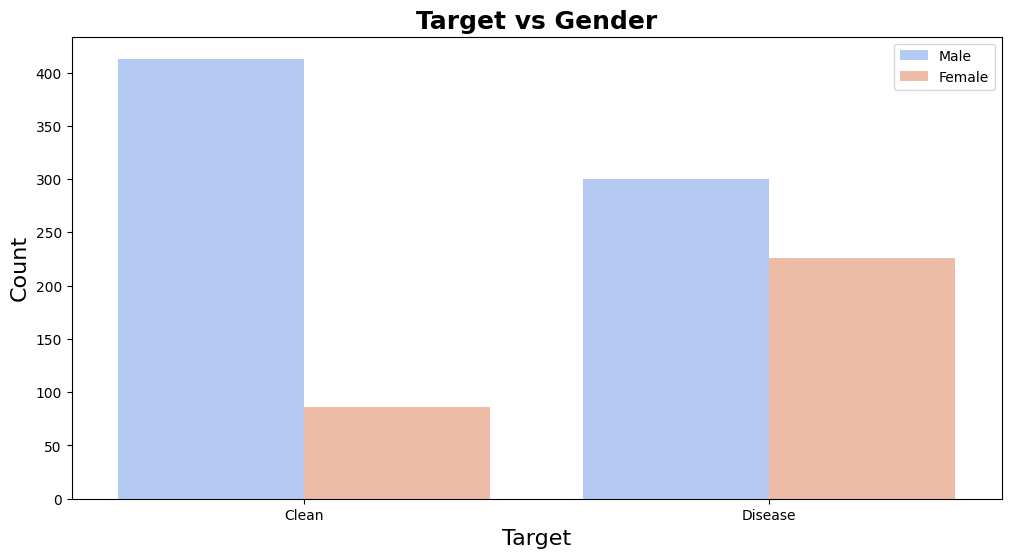

In [39]:
plt.figure(figsize=(12,6))

plt.title('Target vs Gender', fontsize=18, fontweight='bold')

sns.countplot(x=df1['Target'], hue=df1['Sex'], palette='coolwarm')

plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

<Axes: >

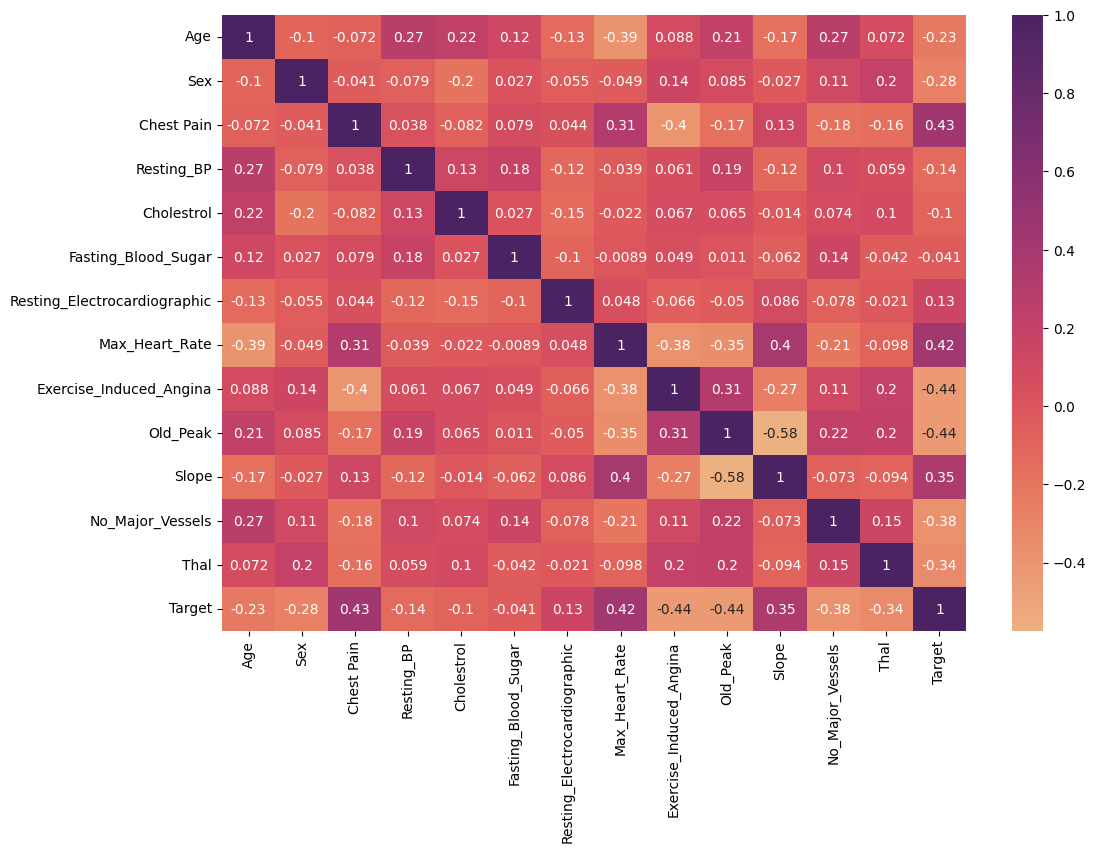

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), square=False, cmap='flare', annot=True)

# Machine_Learning

In [42]:
# Creating Features (X) and Target (y) variables
X = df.drop(['Target'], axis=1)
y = df['Target']

### Finding Best Features for Model

In [45]:
# Initializing SelectKBest class for finding features and applying on X and y variables

best_features = SelectKBest(f_classif, k=13)

X_new = best_features.fit_transform(X, y)

# Creating list of all the columns and their score in variables
selected_features = X.columns[best_features.get_support()]
feature_score = best_features.scores_[best_features.get_support()]

# Creating dataframe of all the columns and their score
df_feature = pd.DataFrame({'Features': selected_features, 'Scores': feature_score})

# Sort the created dataframe in descending order
feature_score_df = df_feature.sort_values(by='Scores', ascending=False)



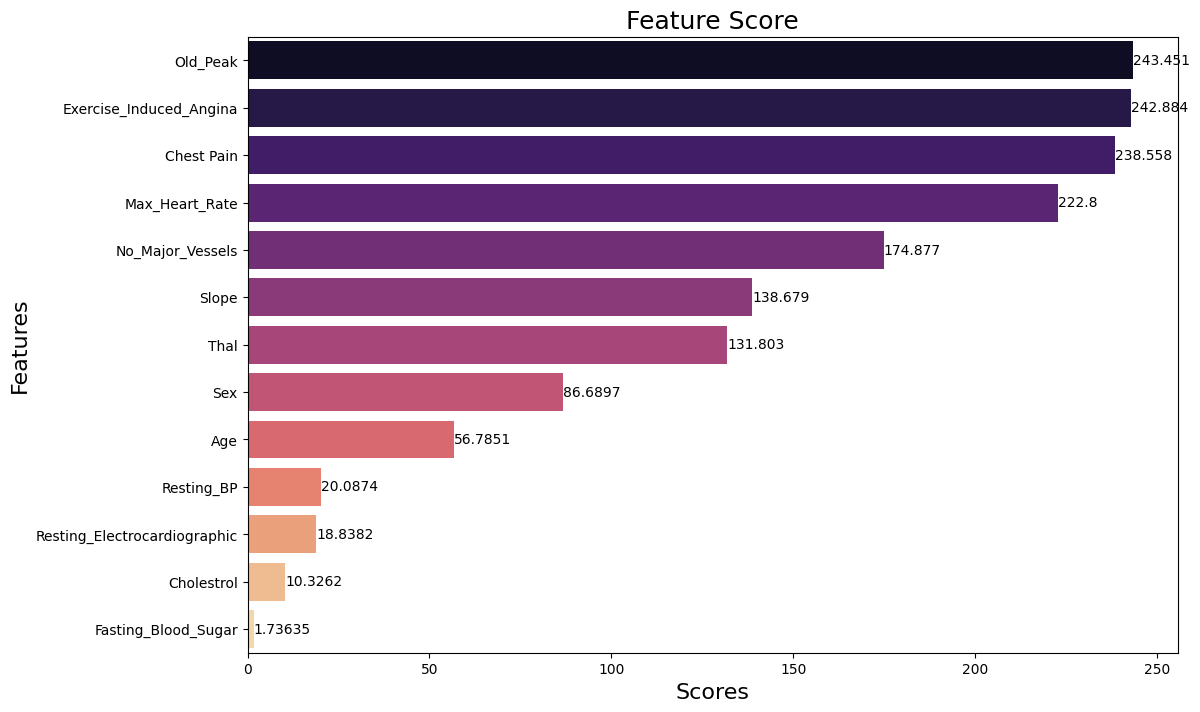

In [46]:
# Plot a barplot to for better understanding of the features and scores
plt.figure(figsize=(12,8))

ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')

plt.title('Feature Score', fontsize=18)

plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [47]:
# Dropping the low scored features 
X = X.drop(['Resting_BP', 'Resting_Electrocardiographic', 'Cholestrol', 'Fasting_Blood_Sugar'], axis=1)

In [50]:
# Storing all columns name in a variable
col = X.columns

# Initializing the Standard Scaler
sc = StandardScaler()

X[col] = sc.fit_transform(X[col])
X.head()

# sc = StandardScaler()

# for col in X.columns:
#     if X[col].dtype == 'object' or X[col].dtype == 'category':
#         X[col] = sc.fit_transform(X[col])
#     else:
#         pass

,Age,Sex,Chest Pain,Max_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,No_Major_Vessels,Thal
0,-0.268437,0.661504,-0.915755,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [51]:
#Train & Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

In [57]:
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.976829268292683
Test Accuracy: 0.9853658536585366

Model: Gradient Boosting
Cross-validation Accuracy: 0.9524390243902439
Test Accuracy: 0.9317073170731708

Model: Support Vector Machine
Cross-validation Accuracy: 0.9085365853658537
Test Accuracy: 0.8926829268292683

Model: Logistic Regression
Cross-validation Accuracy: 0.853658536585366
Test Accuracy: 0.8

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.8634146341463413
Test Accuracy: 0.8682926829268293

Model: Decision Tree
Cross-validation Accuracy: 0.9719512195121951
Test Accuracy: 0.9853658536585366

Model: Ada Boost
Cross-validation Accuracy: 0.8865853658536584
Test Accuracy: 0.824390243902439

Model: XG Boost
Cross-validation Accuracy: 0.9817073170731707
Test Accuracy: 0.9853658536585366

Model: Naive Bayes
Cross-validation Accuracy: 0.8365853658536585
Test Accuracy: 0.7902439024390244

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])


In [ ]:
# # Initializing the KNeighborsClassifier class
# knn = KNeighborsClassifier()

# # Creating Params for our class
# params_knn = {'n_neighbors':[1,3,5,7,9,11], 'metric': ['euclidean', 'manhattan', 'chebyshev']}

# # Running the model with GridSearchCV class
# grid_knn = GridSearchCV(knn, params_knn, cv=6, n_jobs=-1)
# grid_knn.fit(X_train, y_train)

In [60]:
rf=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)

grid_rf.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_rf.best_params_)

# Get the best estimator
print("Best estimator found: ", grid_rf.best_estimator_)

# Get the best score
print("Best score found: ", grid_rf.best_score_)


# Evaluate the best model
best_model = grid_rf.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: ", accuracy)




Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best estimator found:  RandomForestClassifier(bootstrap=False, n_estimators=50, random_state=42)
Best score found:  0.9792682926829268
Test set accuracy:  0.9853658536585366


In [61]:

# Predicting the result using Best Model
y_pred_rf = best_model.predict(X_test)

In [62]:
# Evaluting the Model on Test Data

print(f'Accuracy Score for {best_model}: ' , accuracy_score(y_test,y_pred_rf))

Accuracy Score for RandomForestClassifier(bootstrap=False, n_estimators=50, random_state=42):  0.9853658536585366


In [63]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(95.72222222222221, 0.5, 'Actual Value')

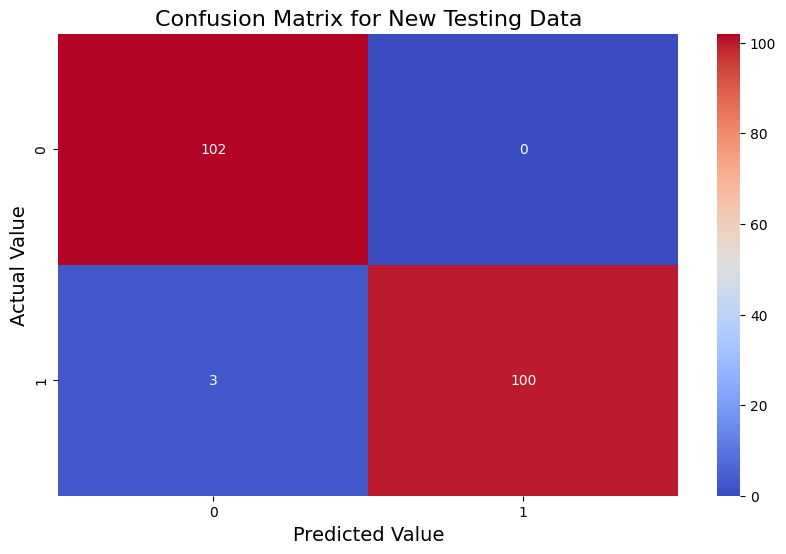

In [64]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

### Evaluting Model on New Synthetic Data

In [65]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 526), (1, 526)]


In [66]:
pred_y_rf = best_model.predict(X_resampled)

print(f'Accuracy Score for {best_model}: ' , accuracy_score(y_resampled,pred_y_rf))

Accuracy Score for RandomForestClassifier(bootstrap=False, n_estimators=50, random_state=42):  0.997148288973384


Text(95.72222222222221, 0.5, 'Actual Value')

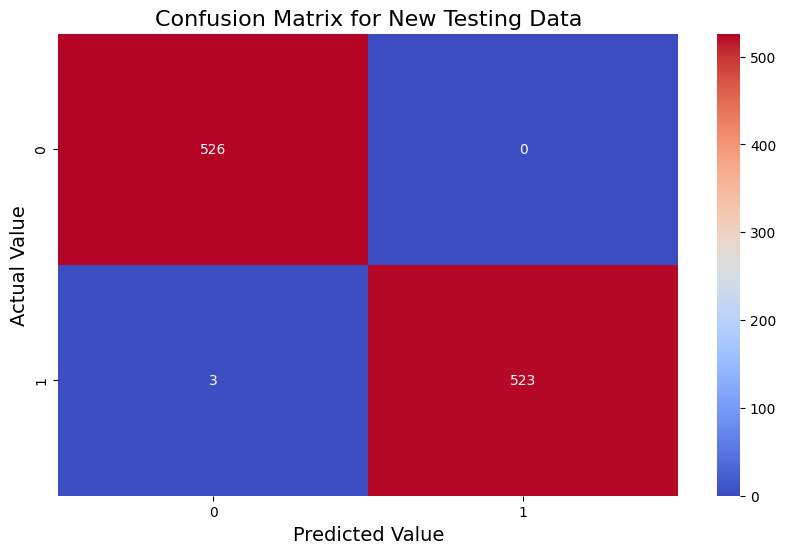

In [67]:
cm1 = confusion_matrix(y_resampled, pred_y_rf)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)